# Examining Features thats impacts Warfarin Does with Freature Importance
---
## CATALOG

### 1. Load Data
### 2. Machine Learning Methods
### 3. Feature Importance
### 4. Analyze Feature Importance
### 5. Feature Selection Report for INR Prediction (Neural Network)
### 6. Save Training Data for Neural Network

---
# 1. Load Data
---

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('datasets/cleaned_data.csv')
df

,Height (cm),Weight (kg),INR on Reported Therapeutic Dose of Warfarin,Current Smoker,Diabetes,Amiodarone (Cordarone),Phenytoin (Dilantin),Rifampin or Rifampicin,Sulfonamide Antibiotics,Anti-fungal Azoles,...,VKORC1 -1639 consensus_G/G,Gender_male,Age_20 - 29,Age_30 - 39,Age_40 - 49,Age_50 - 59,Age_60 - 69,Age_70 - 79,Age_80 - 89,Age_90+
0,173.482,75.50,2.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,False,False,True,False
1,166.116,70.00,2.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,False,False,True,False
2,176.022,88.60,1.90,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,False,True,False,False
3,176.022,92.00,2.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,False,True,False,False
4,178.562,114.00,2.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,180.340,77.27,2.30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,True,False,False,False
1483,180.340,84.55,2.30,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,False,True,False,False
1484,185.420,90.91,2.90,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,True,False,False,False,True,False,False,False,False
1485,157.480,86.36,2.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,False,True,False,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1487 entries, 0 to 1486
Data columns (total 30 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Height (cm)                                   1487 non-null   float64
 1   Weight (kg)                                   1487 non-null   float64
 2   INR on Reported Therapeutic Dose of Warfarin  1487 non-null   float64
 3   Current Smoker                                1487 non-null   float64
 4   Diabetes                                      1487 non-null   float64
 5   Amiodarone (Cordarone)                        1487 non-null   float64
 6   Phenytoin (Dilantin)                          1487 non-null   float64
 7   Rifampin or Rifampicin                        1487 non-null   float64
 8   Sulfonamide Antibiotics                       1487 non-null   float64
 9   Anti-fungal Azoles                            1487 non-null   f

---
# 2. Machine Learning Methods
---

In [4]:
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from typing import Dict

# Tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [5]:
RANDOM_STATE: int = 42

MODELS: Dict = {
    'GB': ('GradientBoosting', GradientBoostingRegressor(random_state=RANDOM_STATE)),
    'RF': ('RandomForest', RandomForestRegressor(random_state=RANDOM_STATE)),
    'DT': ('DecisionTree', DecisionTreeRegressor(random_state=RANDOM_STATE)),
    'ET': ('ExtraTrees', ExtraTreesRegressor(random_state=RANDOM_STATE)),
    'XGB': ('XGBoosting', XGBRegressor(random_state=RANDOM_STATE)),
}

In [6]:
def eval_model(y_test:pd.DataFrame, y_pred:pd.DataFrame):
    print("Model Performance".center(100, '-'))
    print("R² score:", r2_score(y_test, y_pred))
    print("RMSE:", root_mean_squared_error(y_test, y_pred))

In [7]:
def importance(model, X:pd.DataFrame, impt_dict=None, idx_name=None):
    importance = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance'])

    importance.sort_values(by='Importance', ascending=False, inplace=True)

    print("Feature Importances".center(100, '-'))
    print(f"{'Feature':<80} {'Importance':>15}")
    for i, row in importance.iterrows():
        print(f"{i:<80} {row['Importance']:>15.6f}")
    
    if impt_dict != None:
        if idx_name != None:
            impt_dict.setdefault('Model', [])
            impt_dict['Model'].append(idx_name)
        else:
            impt_dict.setdefault('Model', [])
            impt_dict['Model'].append(len(impt_dict['Model']) + 1)

        for i in importance.index:
            impt_dict.setdefault(i, [])
            impt_dict[i].append(importance.loc[i, 'Importance'])
        
        return impt_dict

In [8]:
def predict(X_train:pd.DataFrame, y_train:pd.DataFrame, X_test:pd.DataFrame, y_test:pd.DataFrame, importance_dict:Dict, model_use:str=['GB', 'RF', 'ET', 'DT', 'XGB'],):
    model_name, model = MODELS[model_use][0], MODELS[model_use][1]

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    eval_model(y_test, y_pred)

    importance_dict = importance(
        model=model, 
        X=X_train, 
        impt_dict=importance_dict, 
        idx_name=model_name
    )

    return importance_dict

---
# 3. Feature Importance
---

In [9]:
importance_dict = {}

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    # df.drop(columns=['INR on Reported Therapeutic Dose of Warfarin', 'Therapeutic Dose of Warfarin', 'Subject Reached Stable Dose of Warfarin', 'Other']),
    df.drop(columns=['INR on Reported Therapeutic Dose of Warfarin']),
    df['INR on Reported Therapeutic Dose of Warfarin'],
    test_size=0.2,
    train_size=0.8,
    random_state=42,
)

### 1. Decision Tree Regressor

In [11]:
importance_dict = predict(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    importance_dict=importance_dict,
    model_use='DT'
)

-----------------------------------------Model Performance------------------------------------------
R² score: -0.9870496460836446
RMSE: 0.4323577470989852
----------------------------------------Feature Importances-----------------------------------------
Feature                                                                               Importance
Weight (kg)                                                                             0.284902
Therapeutic Dose of Warfarin                                                            0.214713
Height (cm)                                                                             0.210490
CYP2C9 consensus_*1/*2                                                                  0.037420
Age_50 - 59                                                                             0.024868
Diabetes                                                                                0.022691
Gender_male                                                     

### 2. Random Forest Regressor

In [12]:
importance_dict = predict(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    importance_dict=importance_dict,
    model_use='RF',
)

-----------------------------------------Model Performance------------------------------------------
R² score: -0.028059710291861384
RMSE: 0.31099116832881835
----------------------------------------Feature Importances-----------------------------------------
Feature                                                                               Importance
Weight (kg)                                                                             0.252895
Therapeutic Dose of Warfarin                                                            0.227942
Height (cm)                                                                             0.212704
VKORC1 -1639 consensus_A/G                                                              0.025582
Age_60 - 69                                                                             0.025092
VKORC1 -1639 consensus_G/G                                                              0.024508
Age_70 - 79                                                  

### 3. Extra Trees Regressor

In [13]:
importance_dict = predict(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    importance_dict=importance_dict,
    model_use='ET',
)

-----------------------------------------Model Performance------------------------------------------
R² score: -0.13698459678121622
RMSE: 0.3270515236587605
----------------------------------------Feature Importances-----------------------------------------
Feature                                                                               Importance
Weight (kg)                                                                             0.200814
Therapeutic Dose of Warfarin                                                            0.192893
Height (cm)                                                                             0.188227
Gender_male                                                                             0.042249
Diabetes                                                                                0.035989
Current Smoker                                                                          0.035521
CYP2C9 consensus_*1/*2                                         

### 4. XGBoost Regressor

In [14]:
importance_dict = predict(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    importance_dict=importance_dict,
    model_use='XGB',
)

-----------------------------------------Model Performance------------------------------------------
R² score: -0.24894021940717392
RMSE: 0.3427754517262229
----------------------------------------Feature Importances-----------------------------------------
Feature                                                                               Importance
Anti-fungal Azoles                                                                      0.074280
CYP2C9 consensus_*2/*3                                                                  0.064886
CYP2C9 consensus_*2/*2                                                                  0.059783
VKORC1 -1639 consensus_A/G                                                              0.058527
Age_20 - 29                                                                             0.055469
Age_70 - 79                                                                             0.054509
VKORC1 -1639 consensus_G/G                                     

### 5. Gradient Boosting Regressor

In [15]:
importance_dict = predict(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    importance_dict=importance_dict,
    model_use='GB',
)

-----------------------------------------Model Performance------------------------------------------
R² score: -0.027935542694828897
RMSE: 0.31097238722509424
----------------------------------------Feature Importances-----------------------------------------
Feature                                                                               Importance
Therapeutic Dose of Warfarin                                                            0.282030
Weight (kg)                                                                             0.225903
Height (cm)                                                                             0.183067
VKORC1 -1639 consensus_A/G                                                              0.072227
VKORC1 -1639 consensus_G/G                                                              0.038731
Age_70 - 79                                                                             0.035472
CYP2C9 consensus_*2/*3                                       

---
# 4. Analyze Feature Importance
---

In [16]:
importance_df = pd.DataFrame(importance_dict)
importance_df.set_index('Model', inplace=True)
importance_df = importance_df.T
importance_df.index.name = 'Feature'
importance_df

Model,DecisionTree,RandomForest,ExtraTrees,XGBoosting,GradientBoosting
Feature,,,,,
Weight (kg),0.284902,0.252895,0.200814,0.035636,0.225903
Therapeutic Dose of Warfarin,0.214713,0.227942,0.192893,0.043652,0.282030
Height (cm),0.210490,0.212704,0.188227,0.027870,0.183067
CYP2C9 consensus_*1/*2,0.037420,0.022291,0.034839,0.024390,0.008896
Age_50 - 59,0.024868,0.022607,0.023217,0.035705,0.015200
Diabetes,0.022691,0.022681,0.035989,0.030657,0.011063
Gender_male,0.022459,0.016763,0.042249,0.041666,0.004516
VKORC1 -1639 consensus_G/G,0.019106,0.024508,0.013927,0.052883,0.038731
Age_60 - 69,0.018033,0.025092,0.028344,0.035917,0.004904


In [17]:
importance_df.to_csv('./datasets/feature_importance.csv', index=True)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
def plot_importance(importance:pd.DataFrame, plot_type:str=['bar', 'box', 'heat', 'top'], figsize:tuple=(17, 10), top_n:int=15, font_size:float=15.0):
    importance["MeanImportance"] = importance.mean(axis=1)
    df_sorted = importance.sort_values("MeanImportance", ascending=False).drop("MeanImportance", axis=1)
    df_top = df_sorted.head(top_n)

    plt.figure(figsize=figsize)
    match plot_type:
        # Stacked Bar Plot – Compare Importance Across Models
        case 'bar':
            ax = df_top.T.plot(
                kind="bar",
                stacked=True,
                figsize=figsize,
                colormap="tab20"
            )

            plt.title("Stacked Feature Importances Across Models (Top 15 Features)", fontsize=font_size)
            plt.ylabel("Importance Score", fontsize=font_size)
            plt.xlabel("Model", fontsize=font_size)
            plt.xticks(rotation=0)
            plt.legend(title="Feature", bbox_to_anchor=(1.02, 1), loc="upper left")
            plt.tight_layout(rect=[0, 0, 0.85, 1])
            plt.show()
        
        # Box Plot – Importance Distribution Across Models
        case 'box':
            df_melted = df_top.reset_index().melt(id_vars="Feature", var_name="Model", value_name="Importance")
            sns.boxplot(data=df_melted, x="Importance", y="Feature", orient="h", palette="Set3")
            plt.title("Distribution of Feature Importance Across Models", fontsize=font_size)
            plt.tight_layout()
            plt.show()
        
        # Heatmap – Visual Comparison Across Models
        case 'heat':
            sns.heatmap(df_top.T, annot=True, cmap="viridis", fmt=".3f", cbar_kws={'label': 'Importance'})
            plt.title("Heatmap of Feature Importances (Top 15 Features)", fontsize=font_size)
            plt.xticks(rotation=90)
            plt.yticks(rotation=0)
            plt.xlabel("Feature", fontsize=font_size)
            plt.ylabel("Model", fontsize=font_size)
            plt.tight_layout()
            plt.show()

## Stacked Bar Plot – Compare Importance Across Models

<Figure size 1700x1000 with 0 Axes>

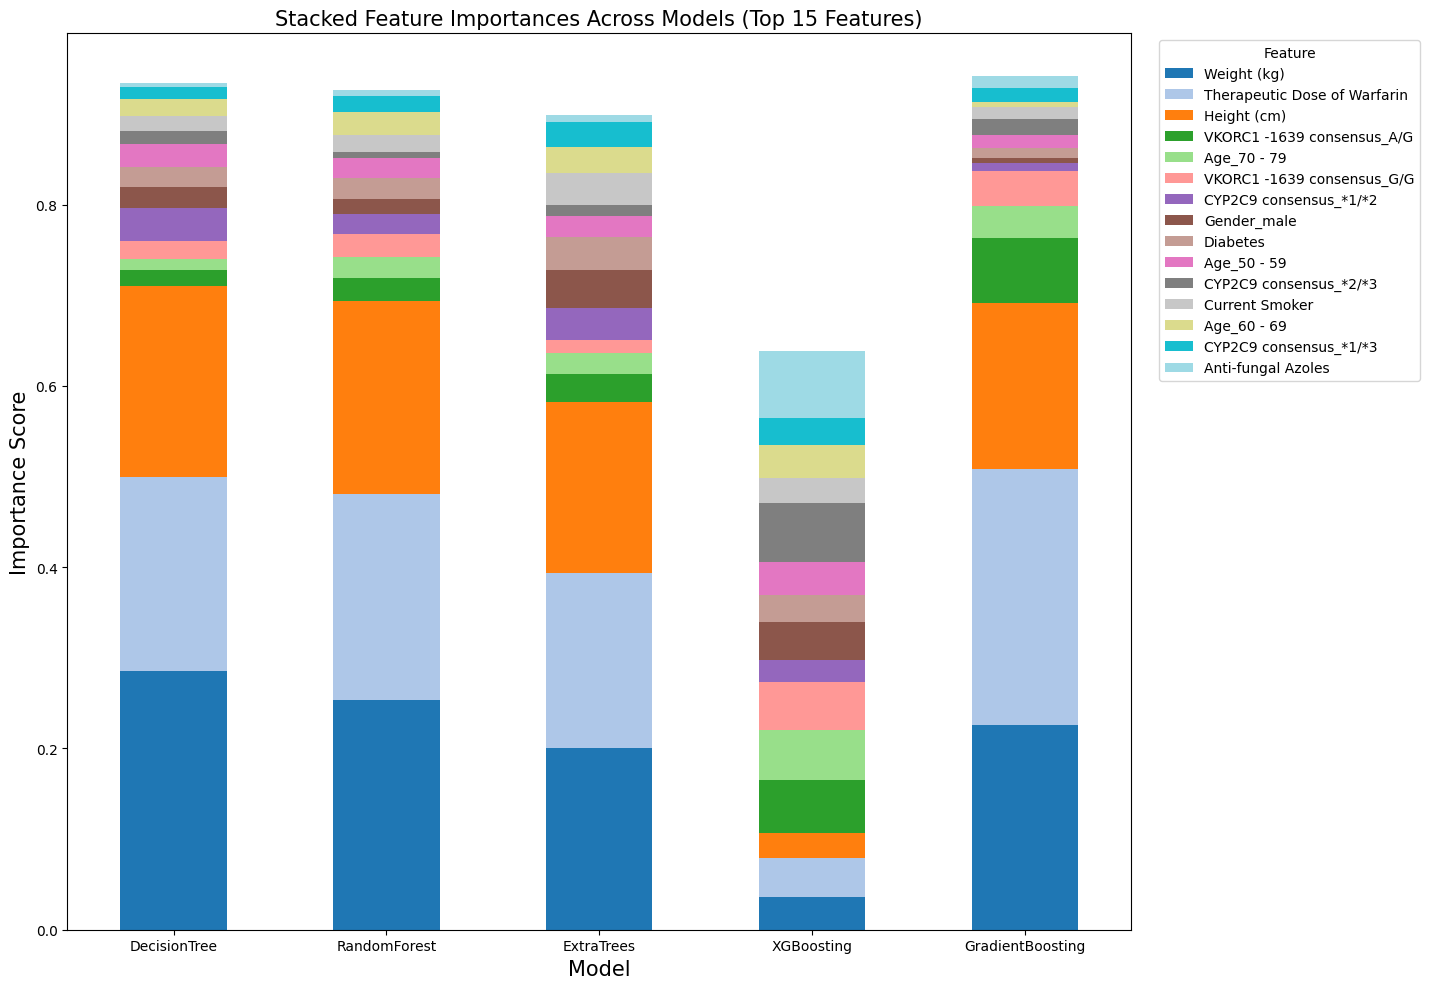

In [20]:
plot_importance(
    importance=importance_df,
    plot_type='bar'
)

## Box Plot – Importance Distribution Across Models

/var/folders/r8/b8mr888s5wzdjlhk9_q3q77w0000gn/T/ipykernel_92927/1673889725.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_melted, x="Importance", y="Feature", orient="h", palette="Set3")


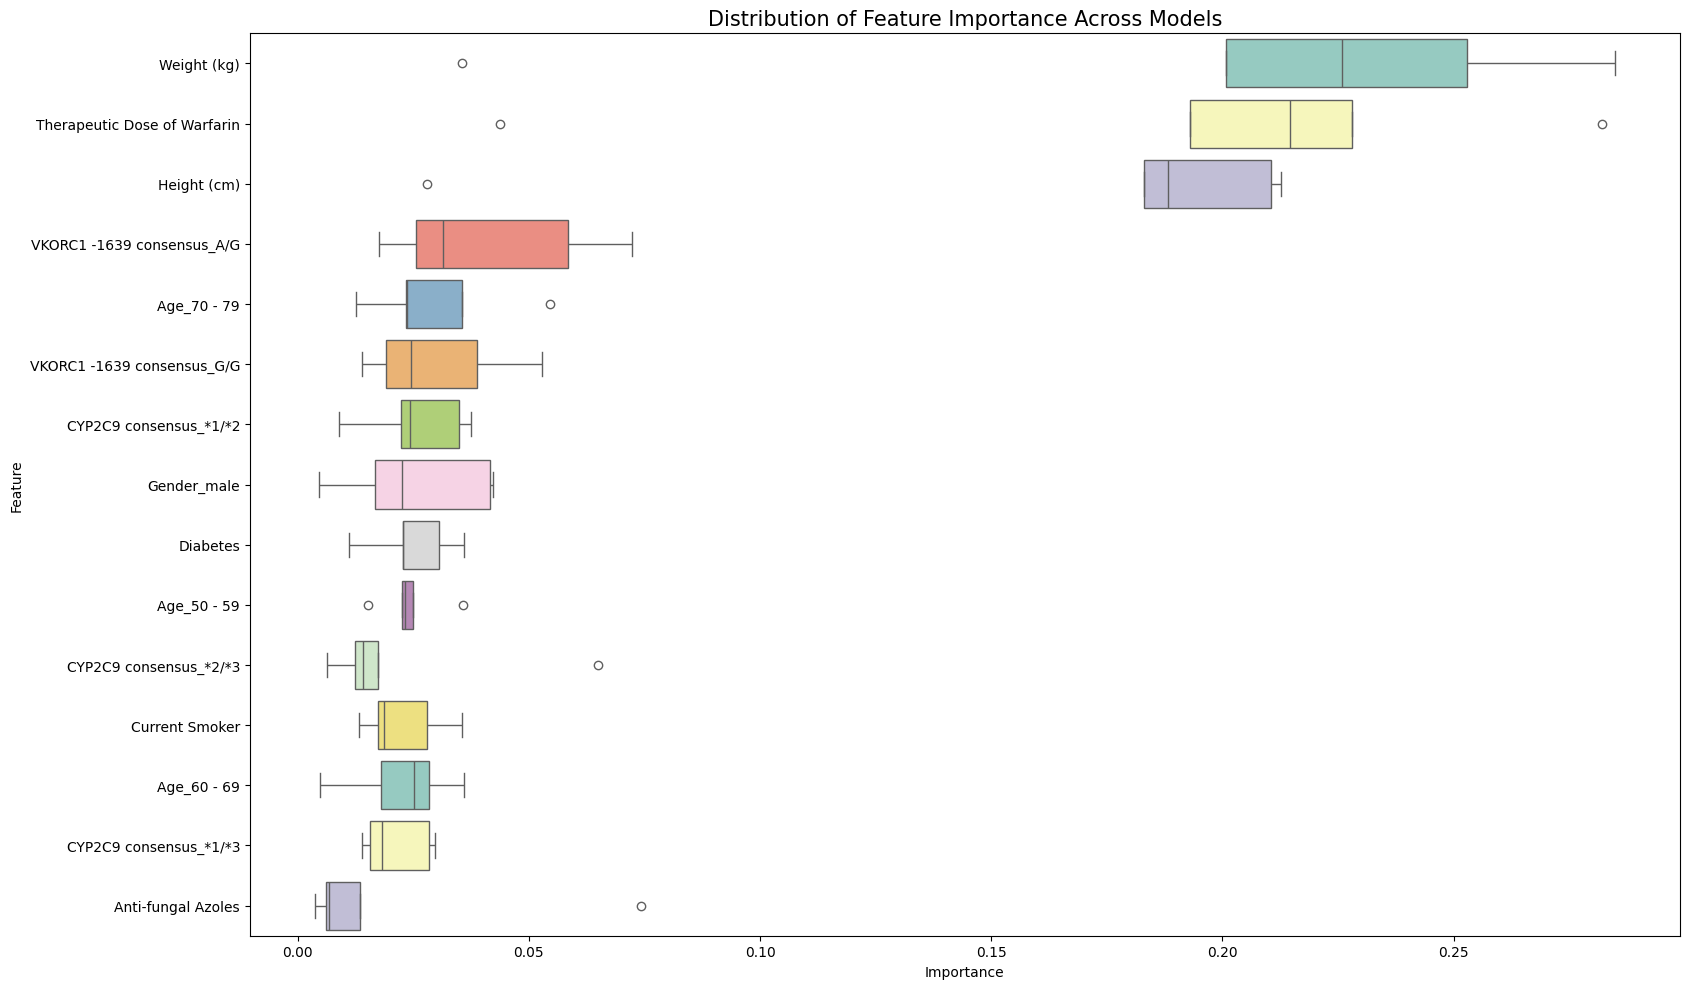

In [21]:
plot_importance(
    importance=importance_df,
    plot_type='box'
)

## Heatmap – Visual Comparison Across Models

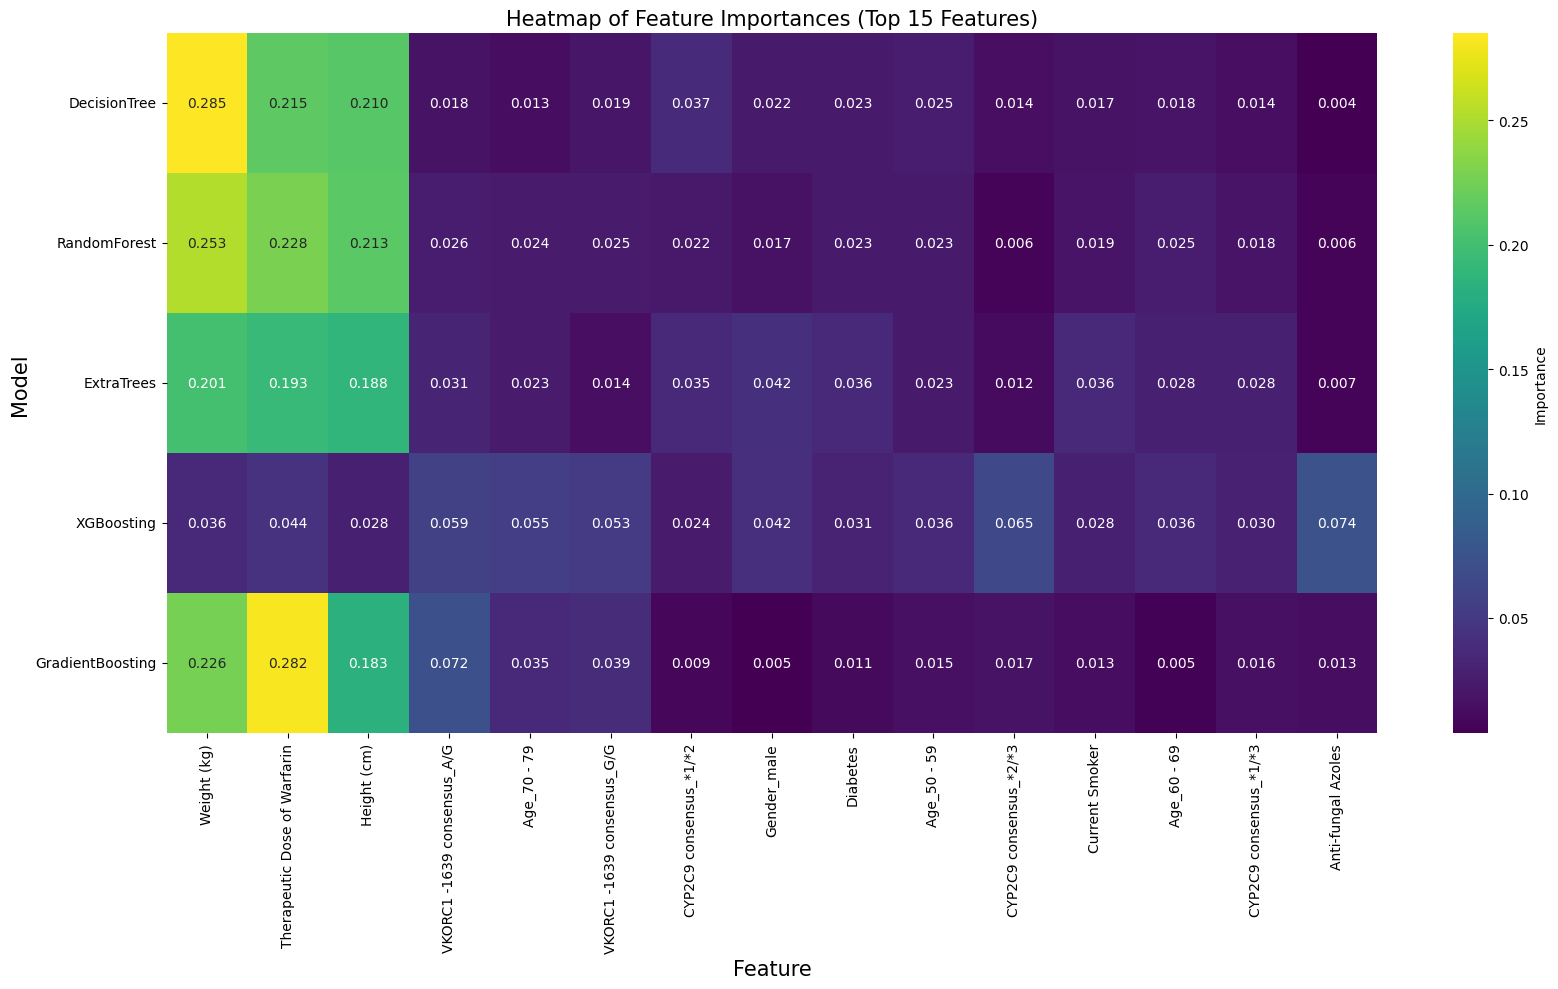

In [22]:
plot_importance(
    importance=importance_df,
    plot_type='heat'
)

---
# 5. Feature Selection Report for INR Prediction (Neural Network)
---

In [23]:
df

,Height (cm),Weight (kg),INR on Reported Therapeutic Dose of Warfarin,Current Smoker,Diabetes,Amiodarone (Cordarone),Phenytoin (Dilantin),Rifampin or Rifampicin,Sulfonamide Antibiotics,Anti-fungal Azoles,...,VKORC1 -1639 consensus_G/G,Gender_male,Age_20 - 29,Age_30 - 39,Age_40 - 49,Age_50 - 59,Age_60 - 69,Age_70 - 79,Age_80 - 89,Age_90+
0,173.482,75.50,2.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,False,False,True,False
1,166.116,70.00,2.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,False,False,True,False
2,176.022,88.60,1.90,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,False,True,False,False
3,176.022,92.00,2.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,False,True,False,False
4,178.562,114.00,2.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,180.340,77.27,2.30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,True,False,False,False
1483,180.340,84.55,2.30,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,False,True,False,False
1484,185.420,90.91,2.90,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,True,False,False,False,True,False,False,False,False
1485,157.480,86.36,2.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,False,True,False,False


In [24]:
importance_df

Model,DecisionTree,RandomForest,ExtraTrees,XGBoosting,GradientBoosting,MeanImportance
Feature,,,,,,
Weight (kg),0.284902,0.252895,0.200814,0.035636,0.225903,0.200030
Therapeutic Dose of Warfarin,0.214713,0.227942,0.192893,0.043652,0.282030,0.192246
Height (cm),0.210490,0.212704,0.188227,0.027870,0.183067,0.164472
CYP2C9 consensus_*1/*2,0.037420,0.022291,0.034839,0.024390,0.008896,0.025567
Age_50 - 59,0.024868,0.022607,0.023217,0.035705,0.015200,0.024320
Diabetes,0.022691,0.022681,0.035989,0.030657,0.011063,0.024616
Gender_male,0.022459,0.016763,0.042249,0.041666,0.004516,0.025531
VKORC1 -1639 consensus_G/G,0.019106,0.024508,0.013927,0.052883,0.038731,0.029831
Age_60 - 69,0.018033,0.025092,0.028344,0.035917,0.004904,0.022458


In [25]:
age_mapping = {
    "Age_20 - 29": 24.5,
    "Age_30 - 39": 34.5,
    "Age_40 - 49": 44.5,
    "Age_50 - 59": 54.5,
    "Age_60 - 69": 64.5,
    "Age_70 - 79": 74.5,
    "Age_80 - 89": 84.5,
    "Age_90+": 95
}

df["Age"] = 0
for col, midpoint in age_mapping.items():
    if col in df.columns:
        df["Age"] += df[col] * midpoint
        if col in df.columns:
            df.drop(columns=col, inplace=True)

df

,Height (cm),Weight (kg),INR on Reported Therapeutic Dose of Warfarin,Current Smoker,Diabetes,Amiodarone (Cordarone),Phenytoin (Dilantin),Rifampin or Rifampicin,Sulfonamide Antibiotics,Anti-fungal Azoles,...,CYP2C9 consensus_*1/*2,CYP2C9 consensus_*1/*3,CYP2C9 consensus_*1/*5,CYP2C9 consensus_*2/*2,CYP2C9 consensus_*2/*3,CYP2C9 consensus_*3/*3,VKORC1 -1639 consensus_A/G,VKORC1 -1639 consensus_G/G,Gender_male,Age
0,173.482,75.50,2.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,True,84.5
1,166.116,70.00,2.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,True,False,True,84.5
2,176.022,88.60,1.90,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,True,False,True,74.5
3,176.022,92.00,2.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,True,False,True,74.5
4,178.562,114.00,2.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,True,54.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,180.340,77.27,2.30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,True,64.5
1483,180.340,84.55,2.30,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,True,False,True,74.5
1484,185.420,90.91,2.90,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,False,True,True,54.5
1485,157.480,86.36,2.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,74.5


In [26]:
for col in df.columns:
    if df[col].dtype == bool:
        df[col] = df[col].astype(int)
df

,Height (cm),Weight (kg),INR on Reported Therapeutic Dose of Warfarin,Current Smoker,Diabetes,Amiodarone (Cordarone),Phenytoin (Dilantin),Rifampin or Rifampicin,Sulfonamide Antibiotics,Anti-fungal Azoles,...,CYP2C9 consensus_*1/*2,CYP2C9 consensus_*1/*3,CYP2C9 consensus_*1/*5,CYP2C9 consensus_*2/*2,CYP2C9 consensus_*2/*3,CYP2C9 consensus_*3/*3,VKORC1 -1639 consensus_A/G,VKORC1 -1639 consensus_G/G,Gender_male,Age
0,173.482,75.50,2.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,84.5
1,166.116,70.00,2.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,1,84.5
2,176.022,88.60,1.90,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,1,74.5
3,176.022,92.00,2.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,1,74.5
4,178.562,114.00,2.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,54.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,180.340,77.27,2.30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,64.5
1483,180.340,84.55,2.30,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,1,74.5
1484,185.420,90.91,2.90,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,1,1,54.5
1485,157.480,86.36,2.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,74.5


In [27]:
drop_cols = [
    "Therapeutic Dose of Warfarin",
    "Age_20 - 29",
    "Age_30 - 39",
    "Age_40 - 49",
    "Age_50 - 59",
    "Age_60 - 69",
    "Age_70 - 79",
    "Age_80 - 89",
    "Age_90+",
]

importance_df["mean_importance"] = importance_df.mean(axis=1)
top_features = (
    importance_df.drop(index=drop_cols, errors="ignore")
    .sort_values("mean_importance", ascending=False)
    .head(15)
    .index.tolist()
)

top_features

['Weight (kg)',
 'Height (cm)',
 'VKORC1 -1639 consensus_A/G',
 'VKORC1 -1639 consensus_G/G',
 'CYP2C9 consensus_*1/*2',
 'Gender_male',
 'Diabetes',
 'CYP2C9 consensus_*2/*3',
 'Current Smoker',
 'CYP2C9 consensus_*1/*3',
 'Anti-fungal Azoles',
 'Amiodarone (Cordarone)',
 'CYP2C9 consensus_*2/*2',
 'CYP2C9 consensus_*1/*14',
 'CYP2C9 consensus_*3/*3']

In [28]:
selected_features = [
    # Target variable
    "INR on Reported Therapeutic Dose of Warfarin",
    "Therapeutic Dose of Warfarin",
    
    # Core features
    "Weight (kg)",
    "Height (cm)",
    "Gender_male",
    "Age",

    # Additional predictive features
    'VKORC1 -1639 consensus_A/G',
    'VKORC1 -1639 consensus_G/G',
    'CYP2C9 consensus_*1/*2',
    'CYP2C9 consensus_*2/*3',
    'CYP2C9 consensus_*1/*3',
    'Amiodarone (Cordarone)',
    'CYP2C9 consensus_*2/*2',
    'CYP2C9 consensus_*1/*14',
    'CYP2C9 consensus_*3/*3',
    'Anti-fungal Azoles',
    'Current Smoker',
    'Diabetes',
]

---
# 6. Save Training Data for Neural Network
--- 

In [29]:
df = df[selected_features]
df

,INR on Reported Therapeutic Dose of Warfarin,Therapeutic Dose of Warfarin,Weight (kg),Height (cm),Gender_male,Age,VKORC1 -1639 consensus_A/G,VKORC1 -1639 consensus_G/G,CYP2C9 consensus_*1/*2,CYP2C9 consensus_*2/*3,CYP2C9 consensus_*1/*3,Amiodarone (Cordarone),CYP2C9 consensus_*2/*2,CYP2C9 consensus_*1/*14,CYP2C9 consensus_*3/*3,Anti-fungal Azoles,Current Smoker,Diabetes
0,2.13,35.000000,75.50,173.482,1,84.5,1,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0
1,2.33,17.500000,70.00,166.116,1,84.5,1,0,0,0,1,0.0,0,0,0,0.0,0.0,0.0
2,1.90,20.000000,88.60,176.022,1,74.5,1,0,1,0,0,0.0,0,0,0,0.0,0.0,1.0
3,2.83,30.000000,92.00,176.022,1,74.5,1,0,1,0,0,0.0,0,0,0,0.0,0.0,0.0
4,2.33,42.000000,114.00,178.562,1,54.5,1,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,2.30,39.974286,77.27,180.340,1,64.5,1,0,0,0,0,0.0,0,0,0,0.0,1.0,0.0
1483,2.30,28.000000,84.55,180.340,1,74.5,1,0,1,0,0,0.0,0,0,0,0.0,0.0,1.0
1484,2.90,49.980000,90.91,185.420,1,54.5,0,1,1,0,0,0.0,0,0,0,0.0,1.0,0.0
1485,2.50,42.490000,86.36,157.480,0,74.5,0,1,0,0,0,0.0,0,0,0,0.0,0.0,0.0


In [30]:
df.to_csv('datasets/NN_Training_Data.csv', index=False)